In [60]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ashwin24081204","key":"80f677a556fd5ff4f07338a19446e242"}'}

In [7]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:

!kaggle datasets download -d uciml/adult-census-income

Dataset URL: https://www.kaggle.com/datasets/uciml/adult-census-income
License(s): CC0-1.0
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 673MB/s]


In [9]:
!unzip adult-census-income.zip

Archive:  adult-census-income.zip
  inflating: adult.csv               


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
df=pd.read_csv("adult.csv")

In [13]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [15]:
df.shape

(32561, 15)

## PREPROCESSING

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [16]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [22]:
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


In [24]:
df.duplicated().sum()

np.int64(24)

In [25]:
df = df.drop_duplicates()

In [26]:
df.duplicated().sum()

np.int64(0)

In [30]:
y = df['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)
X = df.drop(columns=['income'])

In [33]:
category = X.select_dtypes(include='object').columns
X_processed = pd.get_dummies(X, columns=category, drop_first=True)

In [34]:
numeric_cols = X.select_dtypes(exclude='object').columns
scaler = StandardScaler()
X_processed[numeric_cols] = scaler.fit_transform(X_processed[numeric_cols])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)


In [37]:
X_train

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
25267,-1.289474,-0.471498,-0.031815,-0.145975,-0.216743,-1.655530,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3349,0.177041,2.313566,0.357049,0.447703,-0.216743,1.584202,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4584,-1.069496,0.494247,-0.420679,-0.145975,-0.216743,-0.035664,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
7003,1.496905,-0.858794,-0.420679,-0.145975,-0.216743,-1.817516,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
882,-0.262913,0.739759,-0.420679,-0.145975,4.464528,0.774269,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31107,-1.582777,0.024690,-1.976134,-0.145975,-0.216743,0.369303,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
10982,0.250367,2.426787,-1.976134,-0.145975,-0.216743,-0.035664,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
22425,1.203602,1.443232,-0.031815,-0.145975,-0.216743,-0.035664,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
8200,-1.216148,0.452060,-0.420679,-0.145975,-0.216743,-0.035664,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [40]:
y_train

,income
25267,0
3349,1
4584,0
7003,0
882,1
...,...
31107,0
10982,0
22425,0
8200,0


##DESIGNING MULTILAYER PERCEPTRON

In [61]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [62]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [63]:
his = model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/25
651/651 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7553 - loss: 0.4544 - val_accuracy: 0.8511 - val_loss: 0.3232
Epoch 2/25
651/651 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8561 - loss: 0.3078 - val_accuracy: 0.8532 - val_loss: 0.3166
Epoch 3/25
651/651 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8598 - loss: 0.3031 - val_accuracy: 0.8534 - val_loss: 0.3130
Epoch 4/25
651/651 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8616 - loss: 0.2998 - val_accuracy: 0.8523 - val_loss: 0.3151
Epoch 5/25
651/651 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8585 - loss: 0.3016 - val_accuracy: 0.8546 - val_loss: 0.3151
Epoch 6/25
651/651 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8651 - loss: 0.2917 - val_accuracy: 0.8521 - val_loss: 0.3132
Epoch 7/25
651/651 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8651 - loss: 0.2906 - val_accuracy: 0.8556 - val_loss: 0.3122
Epoch 8/25
651/651 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8644 - loss: 0.2969 - val_accuracy: 0.

In [64]:
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt


y_pred_prob = model.predict(X_test)


y_pred = (y_pred_prob > 0.5).astype(int).flatten()

accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test R² Score: {r2:.4f}")


204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test Accuracy: 0.8473
Test MSE: 0.1527
Test R² Score: 0.1649


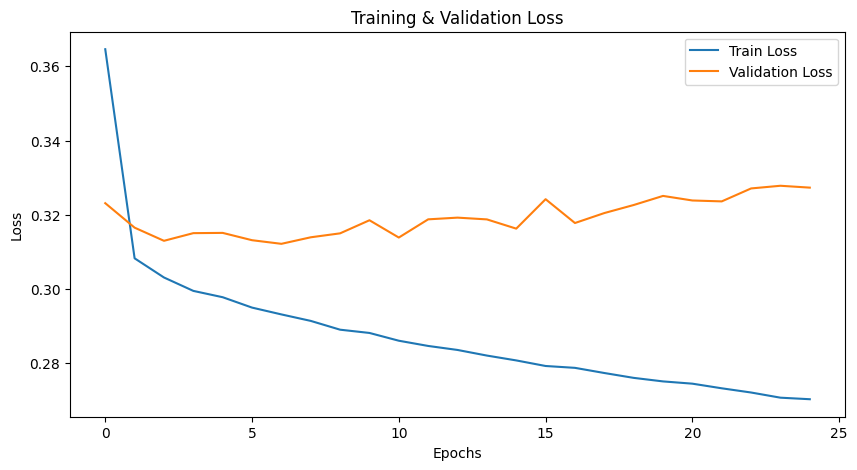

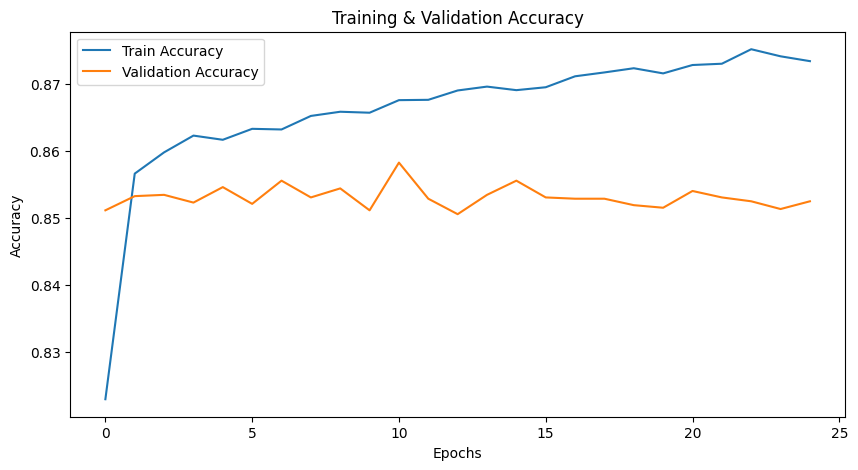

In [65]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,5))
plt.plot(his.history['loss'], label='Train Loss')
plt.plot(his.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(his.history['accuracy'], label='Train Accuracy')
plt.plot(his.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.show()


In [66]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 32)             │         3,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,333 (44.27 KB)

 Trainable params: 3,777 (14.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,556 (29.52 KB)